### Baseline (hypothesis) plots

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [4]:
task_names = ["HotpotQA", "MultispanQA", "24 Game", "GSM8K", "MMLU", "COLLIE", "CSQA", "Hellaswag", "RACE", "PIQA"]
gen = np.array([.62, .7, .06, .815, .616, .283, .355, .54, .722, .875])*100
disc = np.array([.6, .73, .20, .4030, .64, .512, .6, .58, .71, .87])*100
log_probs_gen = np.array([.8, .69, .11, .905, .812, .472, .30, .76, .902, .93])*100
log_probs_disc = np.array([.66, .63, .595, .215, .786, .732, .700, .465, .859, .560])*100

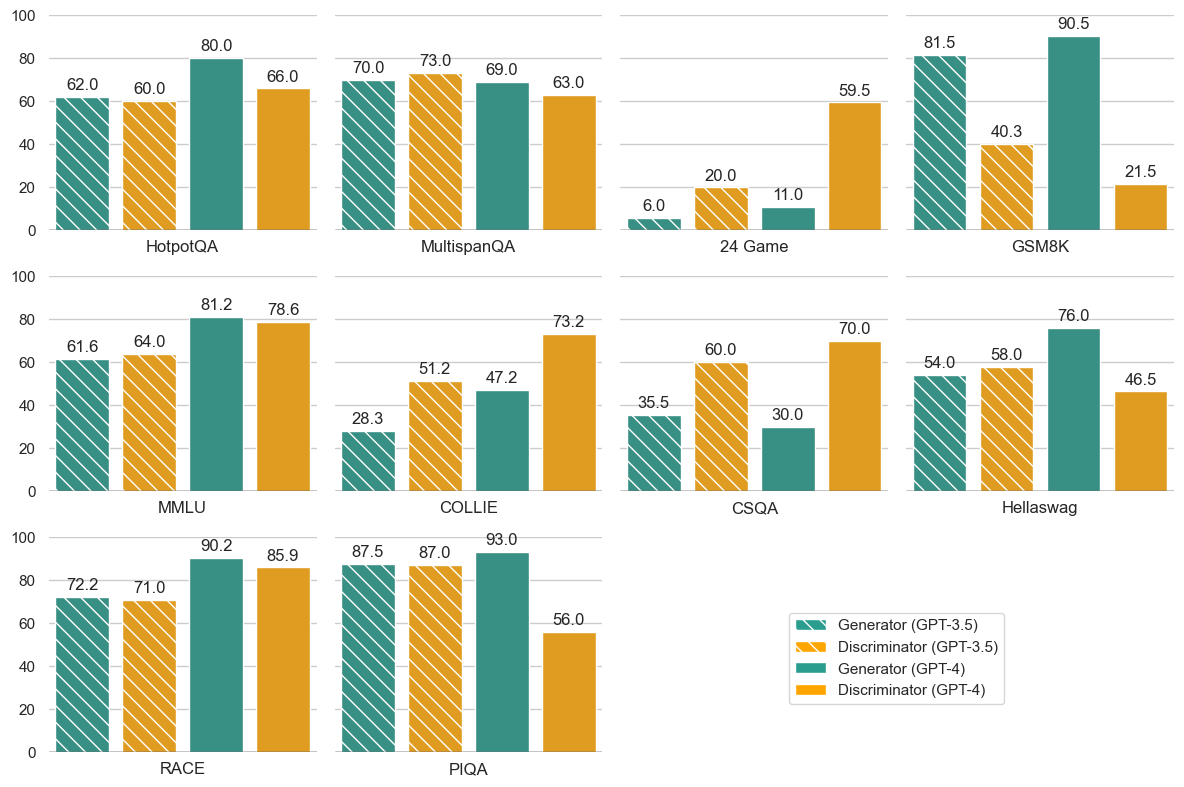

In [7]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create figure
fig = plt.figure(figsize=(12, 8))

# Plot each set of data
for i, task_name in enumerate(task_names):
    ax = fig.add_subplot(3, 4, i+1, frameon=False)  # Remove the frame around each subplot
    ax.set_ylim(0, 100)
    barplot = sns.barplot(x=['Generator (GPT-3.5)', 'Discriminator (GPT-3.5)', 'Generator (GPT-4)', 'Discriminator (GPT-4'],
                          y=[gen[i], disc[i], log_probs_gen[i], log_probs_disc[i]],
                          palette=['#2a9d8f', 'orange', '#2a9d8f', 'orange'], ax=ax, edgecolor='white')  # Use dark pale blue color instead of purple

    # Add hatch patterns only for Generator and Discriminator bars
    for j, bar in enumerate(barplot.patches):
        if j < 2:  # Generator and Discriminator bars
            bar.set_hatch('\\\\')  # Thick white stripes for Generator and Discriminator
        else:
            break

    # Add dataset names below the graphs
    ax.text(0.5, -0.1, task_name, transform=ax.transAxes, ha='center')

    # Show y-tick values only on the leftmost plot in each row
    if i % 4 != 0:
        ax.set_yticklabels([])

    # Set the same y-axis limits for each row
    if i % 4 == 0:
        max_val = max(max(gen[i], disc[i], log_probs_gen[i], log_probs_disc[i]) for i in range(len(task_names)))
        # ax.set_ylim(0, max_val)

    # Add x-axis line
    ax.axhline(color='black', linewidth=1)

    # Remove x-axis labels
    ax.set_xticks([])

    # Annotate each bar with its value
    for bar in barplot.patches:
        ax.annotate('{:.1f}'.format(bar.get_height()),
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

# Custom legend handles with hatch patterns
legend_handles = [
    Patch(facecolor='#2a9d8f', label='Generator (GPT-3.5)', hatch='\\\\'),
    Patch(facecolor='orange', label='Discriminator (GPT-3.5)', hatch='\\\\'),
    Patch(facecolor='#2a9d8f', label='Generator (GPT-4)'),
    Patch(facecolor='orange', label='Discriminator (GPT-4)')
]

# Add legend with custom handles, centered in the bottom right corner
fig.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(0.85, 0.1), ncol=1)

# Adjust layout
plt.tight_layout()

# Export to PDF
plt.savefig('baseline_3.5.pdf')

# Show the plot
plt.show()


### SH1: Prompting can close the generation gap

In [66]:
task_names = ["HotpotQA", "MultispanQA", "GSM8K", "MMLU", "Hellaswag", "RACE", "PIQA"] # names of tasks where at GPT 3.5 or 4 has gen. outperforming disc.
# ug_orig_35 = [.02, None, .412, None, None, .012, .005] # original understanding gap on GPT 3.5
# ug_new_35 = [-.01, None, .412, None, None, .004, .005] # lowest understanding gap on GPT 3.5 after experimenting with prompts
# ug_orig_4 = [.14, .06, .69, .597, .295, .043, .055]
# ug_new_4 = [0, 0, .235, .014, .295, .043, .055]

task_names = ["HotpotQA", "GSM8K", "RACE", "PIQA"]
ug_orig_35 = [.02, .412, .012, .005] # original understanding gap on GPT 3.5
ug_new_35 = [-.01, .412, .004, .005] 

task_names = ["HotpotQA", "MultispanQA", "GSM8K", "MMLU", "Hellaswag", "RACE", "PIQA"]
ug_orig_4 = [.14, .06, .69, .597, .295, .043, .055]
ug_new_4 = [0, 0, .235, .014, .295, .043, .055]

ug_orig_35 = [.02, .001, .412, .001, .001, .012, .005] # original understanding gap on GPT 3.5
ug_new_35 = [-.01, .001, .412, .001, .001, .004, .005] # lowest understanding gap on GPT 3.5 after experimenting with prompts
ug_orig_4 = [.14, .06, .69, .597, .295, .043, .055]
ug_new_4 = [0, 0, .235, .014, .295, .043, .055]

ug_orig_35 = [100*e for e in ug_orig_35]
ug_new_35 = [100*e for e in ug_new_35]
ug_orig_4 = [100*e for e in ug_orig_4]
ug_new_4 = [100*e for e in ug_new_4]

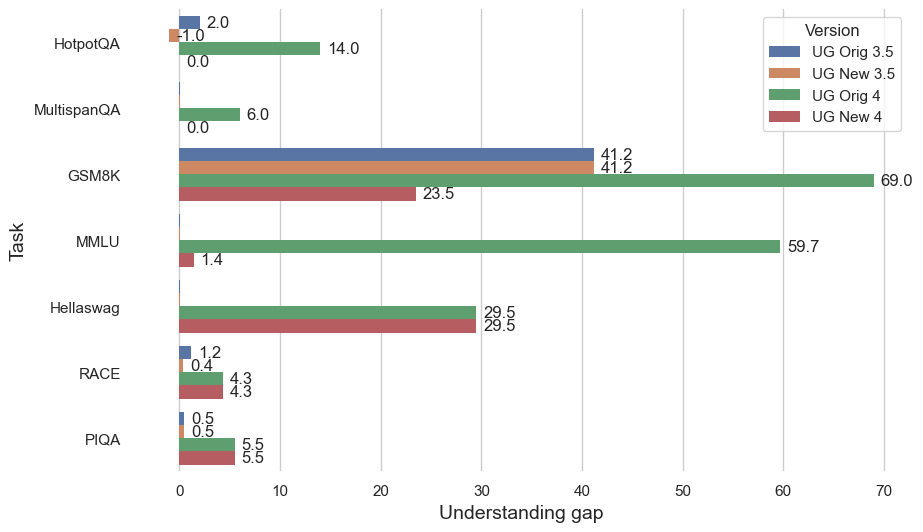

In [81]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
data = {
    "Task": task_names * 4,
    "Version": ['UG Orig 3.5'] * 7 + ['UG New 3.5'] * 7 + ['UG Orig 4'] * 7 + ['UG New 4'] * 7,
    "Value": ug_orig_35 + ug_new_35 + ug_orig_4 + ug_new_4
}

# Ensure all arrays have the same length
assert len(task_names) * 4 == len(ug_orig_35) + len(ug_new_35) + len(ug_orig_4) + len(ug_new_4)

df = pd.DataFrame(data)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x="Value", y="Task", hue="Version", linewidth=0)

# Add value labels to each bar
for p in ax.patches:
    if p.get_width() != 0.1:
        ax.annotate(f'{p.get_width():.1f}', 
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), 
                    xytext=(5, 0), 
                    textcoords='offset points',
                    ha='left', 
                    va='center')

plt.xlabel("Understanding gap", fontsize=14)
plt.ylabel("Task", fontsize=14)
# plt.title("Usage Comparison", fontsize=16)
sns.despine(left=True, right=True, top=True, bottom=True)

plt.savefig("sh1_prompting.pdf", format="pdf")
plt.show()


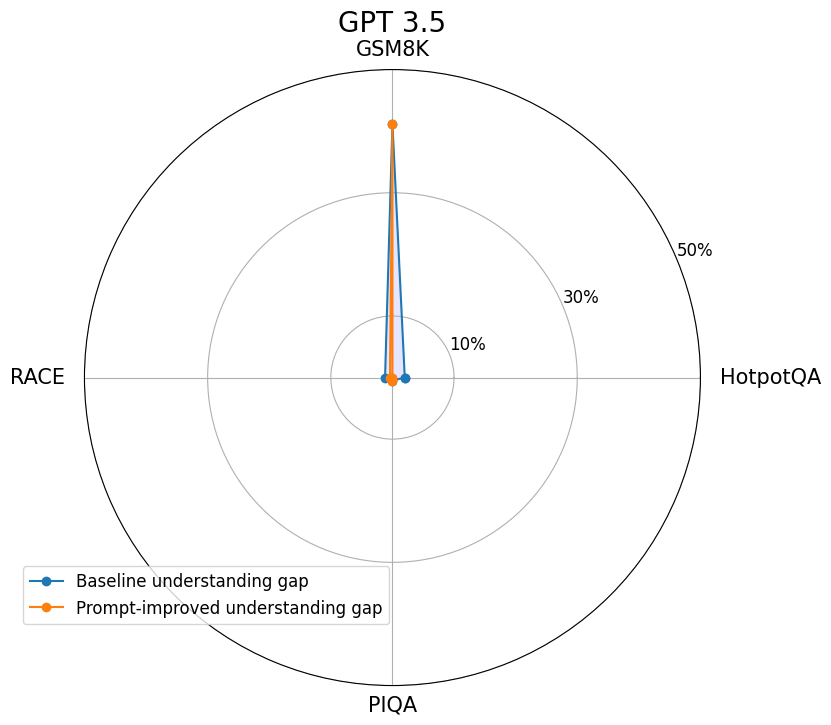

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Data
task_names = ["HotpotQA", "GSM8K", "RACE", "PIQA"]
ug_orig_35 = [0.02, 0.412, 0.012, 0.005]  # original understanding gap on GPT 3.5
ug_new_35 = [0, 0.412, 0.004, 0.005]

# Number of variables
num_vars = len(task_names)

# Compute angle for each task
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
ug_orig_35.append(ug_orig_35[0])
ug_new_35.append(ug_new_35[0])
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.title('GPT 3.5', size=20)

# Plot each line
ax.plot(angles, ug_orig_35, label='Baseline understanding gap', marker='o')
ax.plot(angles, ug_new_35, label='Prompt-improved understanding gap', marker='o')

# Fill area
ax.fill(angles, ug_orig_35, 'b', alpha=0.1)
ax.fill(angles, ug_new_35, 'r', alpha=0.1)

# Labels
ax.set_yticks([0.1, 0.3, 0.5])
ax.set_yticklabels(['10%', '30%', '50%'], fontsize=12)
plt.xticks(angles[:-1], task_names, size=15)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (np.pi/2, 3*np.pi/2):
        label.set_horizontalalignment('center')
    elif 0 <= angle < np.pi/2 or 3*np.pi/2 < angle < 2*np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

# Move labels
ax.set_rlabel_position(22.5)  # Rotate the radial labels slightly

# Add a legend
plt.legend(loc=(-0.1, 0.1), fontsize=12)

plt.savefig("sh1_gpt3.5.pdf", format="pdf")
plt.show()

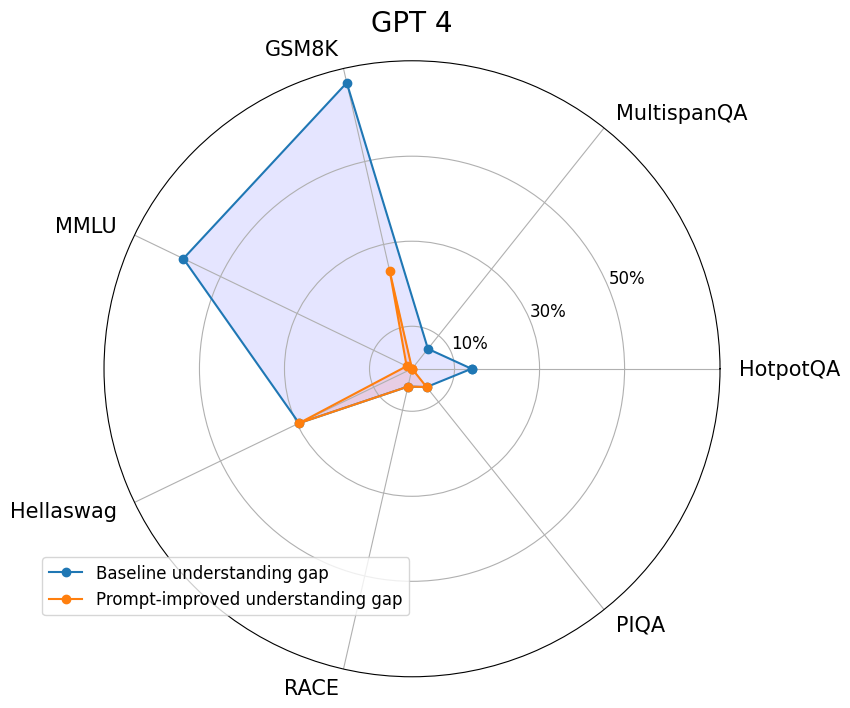

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Data
task_names = ["HotpotQA", "MultispanQA", "GSM8K", "MMLU", "Hellaswag", "RACE", "PIQA"]
ug_orig_4 = [.14, .06, .69, .597, .295, .043, .055]
ug_new_4 = [0, 0, .235, .014, .295, .043, .055]

# Number of variables
num_vars = len(task_names)

# Compute angle for each task
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
ug_orig_4.append(ug_orig_4[0])
ug_new_4.append(ug_new_4[0])
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.title('GPT 4', size=20)

# Plot each line
ax.plot(angles, ug_orig_4, label='Baseline understanding gap', marker='o')
ax.plot(angles, ug_new_4, label='Prompt-improved understanding gap', marker='o')

# Fill area
ax.fill(angles, ug_orig_4, 'b', alpha=0.1)
ax.fill(angles, ug_new_4, 'r', alpha=0.1)

# Labels
ax.set_yticks([0.1, 0.3, 0.5])
ax.set_yticklabels(['10%', '30%', '50%'], fontsize=12)
plt.xticks(angles[:-1], task_names, size=15)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (np.pi/2, 3*np.pi/2):
        label.set_horizontalalignment('center')
    elif 0 <= angle < np.pi/2 or 3*np.pi/2 < angle < 2*np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

# Move labels
ax.set_rlabel_position(22.5)  # Rotate the radial labels slightly

# Add a legend
plt.legend(loc=(-0.1, 0.1), fontsize=12)

plt.savefig("sh1_gpt4.pdf", format="pdf")
plt.show()

### Unused plots

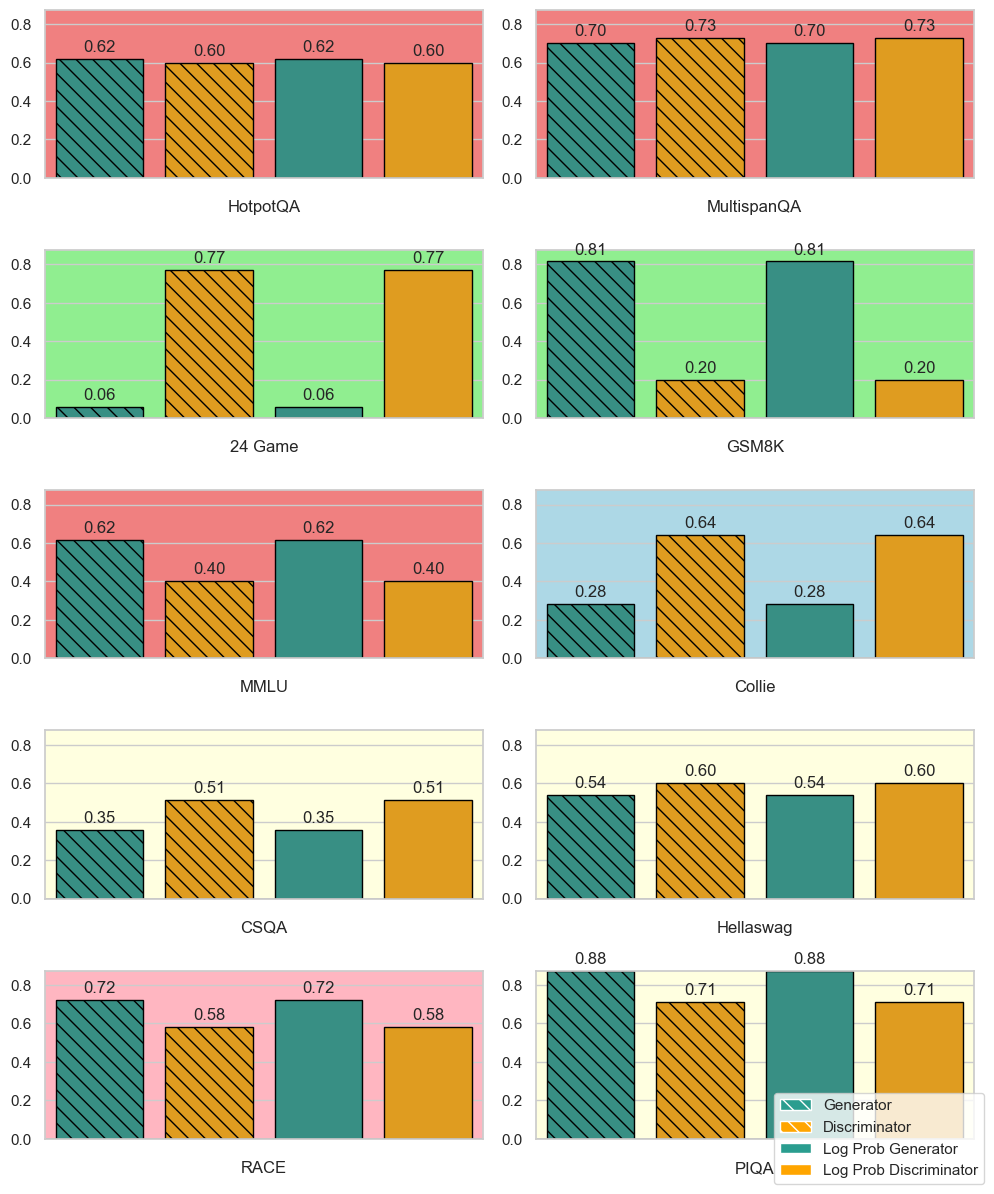

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set Seaborn style
sns.set(style="whitegrid")

# Create figure with 2 columns
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))  # Adjusted figsize

# Define color groups
color_groups = {
    "Constraint Satisfaction": "lightblue",
    "Arithmetic": "lightgreen",
    "Multihop Reasoning": "lightcoral",
    "Commonsense": "lightyellow",
    "Reading Comprehension": "lightpink"
}

# Plot each set of data
for i, (task_name, ax) in enumerate(zip(task_names, axs.flat)):
    # Set background color based on task category
    if task_name in ["Collie"]:
        ax.patch.set_facecolor(color_groups["Constraint Satisfaction"])
    elif task_name in ["24 Game", "GSM8K"]:
        ax.patch.set_facecolor(color_groups["Arithmetic"])
    elif task_name in ["HotpotQA", "MultispanQA", "MMLU"]:
        ax.patch.set_facecolor(color_groups["Multihop Reasoning"])
    elif task_name in ["CSQA", "Hellaswag", "PIQA"]:
        ax.patch.set_facecolor(color_groups["Commonsense"])
    elif task_name in ["RACE"]:
        ax.patch.set_facecolor(color_groups["Reading Comprehension"])

    barplot = sns.barplot(x=['Generator', 'Discriminator', 'Log Prob Generator', 'Log Prob Discriminator'],
                          y=[gen[i], disc[i], log_probs_gen[i], log_probs_disc[i]],
                          palette=['#2a9d8f', 'orange', '#2a9d8f', 'orange'], ax=ax, edgecolor='black')  # Use dark pale blue color instead of purple

    # Add hatch patterns only for Generator and Discriminator bars
    for j, bar in enumerate(barplot.patches):
        if j < 2:  # Generator and Discriminator bars
            bar.set_hatch('\\\\')  # Thick white stripes for Generator and Discriminator
        else:
            break

    # Add dataset names below the graphs
    ax.text(0.5, -0.2, task_name, transform=ax.transAxes, ha='center')  # Adjusted y position

    # Set the same y-axis limits for each row
    max_val = max(max(gen[i], disc[i], log_probs_gen[i], log_probs_disc[i]) for i in range(len(task_names)))
    ax.set_ylim(0, max_val)

    # Add x-axis line
    ax.axhline(color='black', linewidth=1)

    # Remove x-axis labels
    ax.set_xticks([])

    # Annotate each bar with its value
    for bar in barplot.patches:
        ax.annotate('{:.2f}'.format(bar.get_height()),
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

# Custom legend handles with hatch patterns
legend_handles = [
    Patch(facecolor='#2a9d8f', label='Generator', hatch='\\\\'),
    Patch(facecolor='orange', label='Discriminator', hatch='\\\\'),
    Patch(facecolor='#2a9d8f', label='Log Prob Generator'),
    Patch(facecolor='orange', label='Log Prob Discriminator')
]

# Add legend with custom handles, centered in the bottom right corner
fig.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(1, 0), ncol=1)

# Adjust layout
plt.tight_layout()

# Export to PDF
plt.savefig('output.pdf')

# Show the plot
plt.show()
